In [ ]:
from easydl.image import COMMON_IMAGE_TRANSFORM_FOR_TRAINING_V2, TensorToImageTransformToReverseImageNetNormalization
from easydl.public_dataset.cub import get_train_dataset_with_image_and_encoded_labels

# the following example shows how to turn an image into a tensor and then reverse the normalization to visualize it

ds_train = get_train_dataset_with_image_and_encoded_labels()
display(ds_train[0]['x'])

ds_train.extend_lambda_dict({'x': COMMON_IMAGE_TRANSFORM_FOR_TRAINING_V2})

pil_image = TensorToImageTransformToReverseImageNetNormalization(ds_train[0]['x'])
pil_image.show()

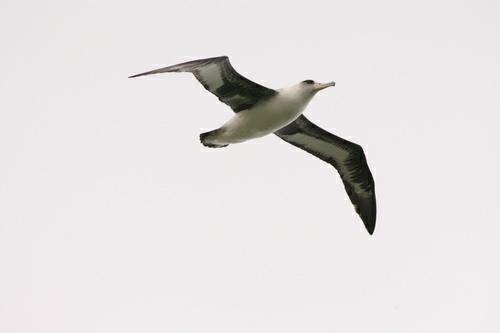

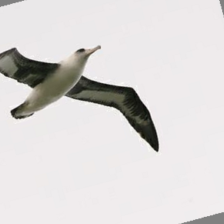

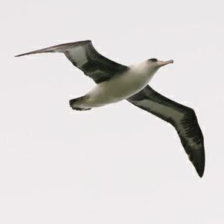

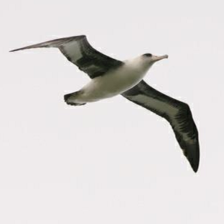

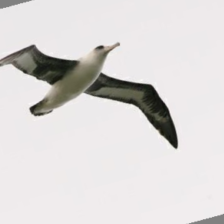

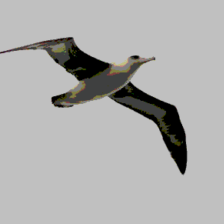

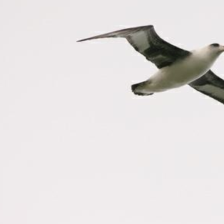

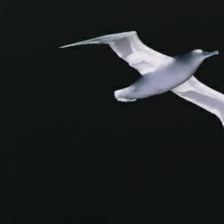

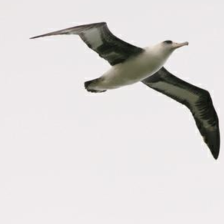

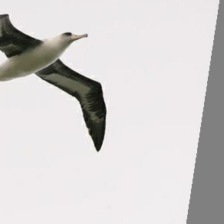

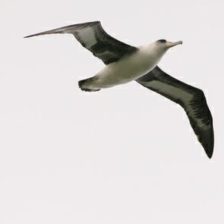

In [ ]:
from easydl.image import COMMON_IMAGE_TRANSFORM_FOR_TRAINING_V2, TensorToImageTransformToReverseImageNetNormalization
from easydl.public_dataset.cub import get_train_dataset_with_image_and_encoded_labels
import timm
from timm.data import auto_augment_transform, rand_augment_transform
import torchvision.transforms as transforms

# the following example shows how to turn an image into a tensor and then reverse the normalization to visualize it

ds_train = get_train_dataset_with_image_and_encoded_labels() if ds_train is None else ds_train
image_0 = ds_train[0]['x']
display(image_0)

# tfm = auto_augment_transform(config_str='original')
data_aug_tfm = rand_augment_transform('rand-m5-n2')
train_transforms = transforms.Compose([
    data_aug_tfm,
    transforms.Resize(256), 
    transforms.RandomCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# generate 10 different random augmented images
for i in range(10):
    image_0_transformed = train_transforms(image_0)
    image_0_transformed = TensorToImageTransformToReverseImageNetNormalization(image_0_transformed)
    display(image_0_transformed)